## Prepare Dataset

### Flow count for VPN and non-VPN

label
NoVPN    43597
VPN       8350
Name: count, dtype: int64


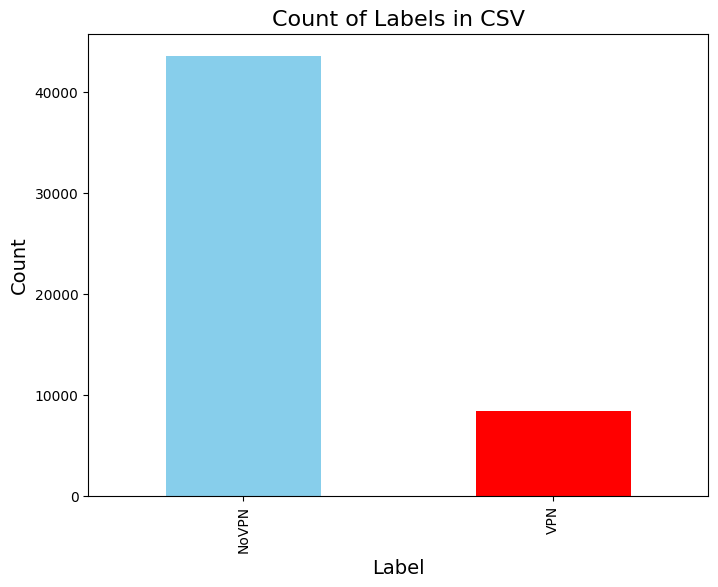

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./VANT/WF/flows_extra_labelled_12.csv',low_memory=False)

label_counts = df['label'].value_counts()
print(label_counts)

plt.figure(figsize=(8, 6))  
label_counts.plot(kind='bar', color=['skyblue', 'red'])  

plt.title('Count of Labels in CSV', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()


### Create a dataset for Wavelet Features

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('./VANT/WF/flows_extra_labelled_12.csv',low_memory=False)


columns_to_select = [
                     #select Wavelet features
                     #forward
                    'udps.f_p_k_0','udps.f_p_k_1','udps.f_p_k_2','udps.f_p_k_3','udps.f_p_k_4','udps.f_p_k_5','udps.f_p_k_6',
                     'udps.f_p_k_7','udps.f_p_k_8','udps.f_p_k_9','udps.f_p_k_10','udps.f_p_k_11','udps.f_p_k_12',

                     'udps.f_u_k_0','udps.f_u_k_1','udps.f_u_k_2','udps.f_u_k_3','udps.f_u_k_4','udps.f_u_k_5','udps.f_u_k_6',
                     'udps.f_u_k_7','udps.f_u_k_8','udps.f_u_k_9','udps.f_u_k_10','udps.f_u_k_11','udps.f_u_k_12',
                     
                     'udps.f_sigma_k_0','udps.f_sigma_k_1','udps.f_sigma_k_2','udps.f_sigma_k_3','udps.f_sigma_k_4','udps.f_sigma_k_5',
           'udps.f_sigma_k_6','udps.f_sigma_k_7','udps.f_sigma_k_8','udps.f_sigma_k_9','udps.f_sigma_k_10','udps.f_sigma_k_11','udps.f_sigma_k_12',

                     'udps.f_S_k_0','udps.f_S_k_1','udps.f_S_k_2','udps.f_S_k_3','udps.f_S_k_4','udps.f_S_k_5','udps.f_S_k_6','udps.f_S_k_7',
                     'udps.f_S_k_8','udps.f_S_k_9','udps.f_S_k_10','udps.f_S_k_11','udps.f_S_k_12',
                      #backward
                     'udps.b_p_k_0','udps.b_p_k_1','udps.b_p_k_2','udps.b_p_k_3','udps.b_p_k_4','udps.b_p_k_5','udps.b_p_k_6',
                     'udps.b_p_k_7','udps.b_p_k_8','udps.b_p_k_9','udps.b_p_k_10','udps.b_p_k_11','udps.b_p_k_12',

                     'udps.b_u_k_0','udps.b_u_k_1','udps.b_u_k_2','udps.b_u_k_3','udps.b_u_k_4','udps.b_u_k_5','udps.b_u_k_6',
                     'udps.b_u_k_7','udps.b_u_k_8','udps.b_u_k_9','udps.b_u_k_10','udps.b_u_k_11','udps.b_u_k_12',
                     
                     'udps.b_sigma_k_0','udps.b_sigma_k_1','udps.b_sigma_k_2','udps.b_sigma_k_3','udps.b_sigma_k_4','udps.b_sigma_k_5',
           'udps.b_sigma_k_6','udps.b_sigma_k_7','udps.b_sigma_k_8','udps.b_sigma_k_9','udps.b_sigma_k_10','udps.b_sigma_k_11','udps.b_sigma_k_12',

                     'udps.b_S_k_0','udps.b_S_k_1','udps.b_S_k_2','udps.b_S_k_3','udps.b_S_k_4','udps.b_S_k_5','udps.b_S_k_6','udps.b_S_k_7',
                     'udps.b_S_k_8','udps.b_S_k_9','udps.b_S_k_10','udps.b_S_k_11','udps.b_S_k_12'
                   , 'label','category']
df_WNF = df1[columns_to_select]                  

df_WNF.to_csv('./VANT/WF/flows_extra_labelled_WF12.csv', index=False)

### Rndom Forest

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

output_dir = "output_results"
os.makedirs(output_dir, exist_ok=True)

file_path = './VANT/WF/flows_extra_labelled_WF12.csv'  
df = pd.read_csv(file_path)

df['label_encoded'] = df['label'].map({'NoVPN': 0, 'VPN': 1})

category = df['category']

X = df.drop(['label', 'label_encoded', 'category'], axis=1)
y = df['label_encoded']

X_train, X_test, y_train, y_test, category_train, category_test = train_test_split(
    X, y, category, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, normalize='true')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NoVPN', 'VPN']))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=['non-VPN', 'VPN'], 
yticklabels=['non-VPN', 'VPN'], annot_kws={"size": 16}) 

plt.xlabel("Predicted Label", fontsize=20)
plt.ylabel("True Label", fontsize=20)
plt.title("", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

conf_matrix_path = os.path.join(output_dir, "confusion_matrix_RF12.png")
plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
plt.close()

accuracy_report_path = os.path.join(output_dir, "RF12.txt")
with open(accuracy_report_path, "w") as f:
    f.write(f"Train Accuracy: {train_accuracy:.4f}\n")
    
    f.write(f"Test Accuracy: {test_accuracy:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred, target_names=['NoVPN', 'VPN']))

misclassified_mask = (y_test != y_pred)
misclassified_samples = X_test.loc[misclassified_mask].copy()

misclassified_samples['true_label'] = y_test.loc[misclassified_mask]
misclassified_samples['predicted_label'] = y_pred[misclassified_mask]
misclassified_samples['category'] = category_test.loc[misclassified_mask]

label_map = {0: 'NoVPN', 1: 'VPN'}
misclassified_samples['true_label'] = misclassified_samples['true_label'].map(label_map)
misclassified_samples['predicted_label'] = misclassified_samples['predicted_label'].map(label_map)

misclassification_detail = misclassified_samples.groupby(['category', 'true_label', 'predicted_label']).size().reset_index(name='count')

print("\nDetailed Misclassification Summary (per Category):")
print(misclassification_detail)

misclassification_detail_path = os.path.join(output_dir, "RF12.csv")
misclassification_detail.to_csv(misclassification_detail_path, index=False)

print("Confusion matrix saved at:", conf_matrix_path)
print("Accuracy and classification report saved at:", accuracy_report_path)
print("Detailed misclassification summary saved at:", misclassification_detail_path)


Train Accuracy: 0.999975936665303
Test Accuracy: 0.9932627526467758

Confusion Matrix:
[[0.99713336 0.00286664]
 [0.02696225 0.97303775]]

Classification Report:
              precision    recall  f1-score   support

       NoVPN       0.99      1.00      1.00      8721
         VPN       0.98      0.97      0.98      1669

    accuracy                           0.99     10390
   macro avg       0.99      0.99      0.99     10390
weighted avg       0.99      0.99      0.99     10390


Detailed Misclassification Summary (per Category):
            category true_label predicted_label  count
0               Chat      NoVPN             VPN     17
1               Chat        VPN           NoVPN     29
2  Command & Control      NoVPN             VPN      2
3  Command & Control        VPN           NoVPN      4
4      File Transfer        VPN           NoVPN      8
5          Streaming      NoVPN             VPN      6
6          Streaming        VPN           NoVPN      4
Confusion matrix sa

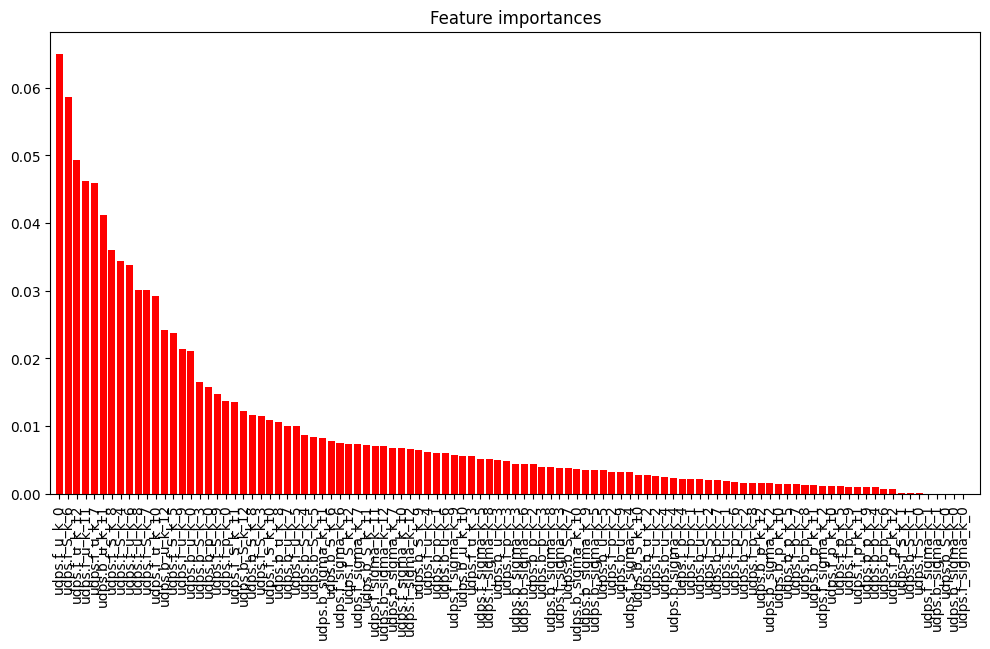

In [18]:
#  feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]+1])
plt.show()

### SVM

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

output_dir = "output_results"
os.makedirs(output_dir, exist_ok=True)

file_path = './VANT/WF/flows_extra_labelled_WF12.csv'  # Update path if needed
df = pd.read_csv(file_path)

df['label_encoded'] = df['label'].map({'NoVPN': 0, 'VPN': 1})

category = df['category']

X = df.drop(['label', 'label_encoded', 'category'], axis=1)
y = df['label_encoded']


X_train, X_test, y_train, y_test, category_train, category_test = train_test_split(
    X, y, category, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)


clf = LinearSVC(random_state=42, max_iter=10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, normalize='true')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NoVPN', 'VPN']))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=['NoVPN', 'VPN'], 
yticklabels=['NoVPN', 'VPN'], annot_kws={"size": 16})  # Enlarged numbers inside the matrix

plt.xlabel("Predicted Label", fontsize=20)
plt.ylabel("True Label", fontsize=20)
plt.title("", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

conf_matrix_path = os.path.join(output_dir, "confusion_matrix_SVM12.png")
plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
plt.close()

accuracy_report_path = os.path.join(output_dir, "SVM12.txt")
with open(accuracy_report_path, "w") as f:
    f.write(f"Train Accuracy: {train_accuracy:.4f}\n")
    f.write(f"Test Accuracy: {test_accuracy:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred, target_names=['NoVPN', 'VPN']))
print("Accuracy and classification report saved.")

misclassified_mask = (y_test != y_pred)
misclassified_samples = X_test.loc[misclassified_mask].copy()

misclassified_samples['true_label'] = y_test.loc[misclassified_mask]
misclassified_samples['predicted_label'] = y_pred[misclassified_mask]
misclassified_samples['category'] = category_test.loc[misclassified_mask]

label_map = {0: 'NoVPN', 1: 'VPN'}
misclassified_samples['true_label'] = misclassified_samples['true_label'].map(label_map)
misclassified_samples['predicted_label'] = misclassified_samples['predicted_label'].map(label_map)

misclassification_detail = misclassified_samples.groupby(['category', 'true_label', 'predicted_label']).size().reset_index(name='count')

print("\nDetailed Misclassification Summary (per Category):")
print(misclassification_detail)

misclassification_detail_path = os.path.join(output_dir, "SVM12.csv")
misclassification_detail.to_csv(misclassification_detail_path, index=False)

print("Confusion matrix saved at:", conf_matrix_path)
print("Accuracy and classification report saved at:", accuracy_report_path)
print("Detailed misclassification summary saved at:", misclassification_detail_path)


Train Accuracy: 0.8993911976321679
Test Accuracy: 0.8962463907603465

Confusion Matrix:
[[0.93165921 0.06834079]
 [0.28879569 0.71120431]]

Classification Report:
              precision    recall  f1-score   support

       NoVPN       0.94      0.93      0.94      8721
         VPN       0.67      0.71      0.69      1669

    accuracy                           0.90     10390
   macro avg       0.80      0.82      0.81     10390
weighted avg       0.90      0.90      0.90     10390

Accuracy and classification report saved.

Detailed Misclassification Summary (per Category):
            category true_label predicted_label  count
0               Chat      NoVPN             VPN    459
1               Chat        VPN           NoVPN    311
2  Command & Control      NoVPN             VPN     13
3  Command & Control        VPN           NoVPN     51
4      File Transfer      NoVPN             VPN     27
5      File Transfer        VPN           NoVPN     31
6          Streaming      NoVPN

### Neural Network

In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras

output_dir = "output_results"
os.makedirs(output_dir, exist_ok=True)

file_path = './VANT/WF/flows_extra_labelled_WF12.csv'  
df = pd.read_csv(file_path)

df['label_encoded'] = df['label'].map({'NoVPN': 0, 'VPN': 1})

category = df['category']

X = df.drop(['label', 'label_encoded', 'category'], axis=1)
y = df['label_encoded']

X_train, X_test, y_train, y_test, category_train, category_test = train_test_split(
    X, y, category, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, normalize='true')

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['NoVPN', 'VPN']))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=['NoVPN', 'VPN'], 
yticklabels=['NoVPN', 'VPN'], annot_kws={"size": 16})  # Enlarged numbers inside the matrix

plt.xlabel("Predicted Label", fontsize=20)
plt.ylabel("True Label", fontsize=20)
plt.title("", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

conf_matrix_path = os.path.join(output_dir, "confusion_matrix_NN12.png")
plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
plt.close()

accuracy_report_path = os.path.join(output_dir, "NN12.txt")
with open(accuracy_report_path, "w") as f:
    f.write(f"Train Accuracy: {train_accuracy:.4f}\n")
    f.write(f"Test Accuracy: {test_accuracy:.4f}\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred, target_names=['NoVPN', 'VPN']))

misclassified_mask = (y_test != y_pred)
misclassified_samples = X_test[misclassified_mask]

misclassified_samples = pd.DataFrame(misclassified_samples, columns=X.columns)
misclassified_samples['true_label'] = y_test.loc[misclassified_mask].values
misclassified_samples['predicted_label'] = y_pred[misclassified_mask]
misclassified_samples['category'] = category_test.loc[misclassified_mask].values

label_map = {0: 'NoVPN', 1: 'VPN'}
misclassified_samples['true_label'] = misclassified_samples['true_label'].map(label_map)
misclassified_samples['predicted_label'] = misclassified_samples['predicted_label'].map(label_map)

misclassification_detail = misclassified_samples.groupby(['category', 'true_label', 'predicted_label']).size().reset_index(name='count')

print("\nDetailed Misclassification Summary (per Category):")
print(misclassification_detail)

misclassification_detail_path = os.path.join(output_dir, "NN12.csv")
misclassification_detail.to_csv(misclassification_detail_path, index=False)

print("Confusion matrix saved at:", conf_matrix_path)
print("Accuracy and classification report saved at:", accuracy_report_path)
print("Detailed misclassification summary saved at:", misclassification_detail_path)


Epoch 1/20


C:\Users\yasah\anaconda3\envs\py311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8891 - loss: 0.2258 - val_accuracy: 0.9556 - val_loss: 0.1273
Epoch 2/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9560 - loss: 0.1152 - val_accuracy: 0.9662 - val_loss: 0.0880
Epoch 3/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9680 - loss: 0.0855 - val_accuracy: 0.9680 - val_loss: 0.0817
Epoch 4/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9740 - loss: 0.0705 - val_accuracy: 0.9756 - val_loss: 0.0651
Epoch 5/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9765 - loss: 0.0625 - val_accuracy: 0.9734 - val_loss: 0.0669
Epoch 6/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9801 - loss: 0.0539 - val_accuracy: 0.9794 - val_loss: 0.0601
Epoch 7/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9791 - loss: 0.0550 - val_accuracy: 0.9797 - val_loss: 0.0548
Epoch 8/20
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9821 - loss: 0.0500 - val_accurac